<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Projects_AIML_-/blob/main/MODULE3_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STUDENT TRAINING PROGRAM ON AIML**

**Project : DATA VISUALIZATON , CHOOSING K-VALUE AND APPRECIATING FEATURE SCALIING AND STANDARDIZATION **

**Binary Classification Task: Diabetes Dataset**

Exploratory Data Analysis (EDA) and Statistical Analysis

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_diabetes_data.csv to preprocessed_diabetes_data.csv


In [3]:
diabetes_data = pd.read_csv('preprocessed_diabetes_data.csv')

In [4]:
diabetes_data.head(12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


# Identification of Variables and data types

In [5]:
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


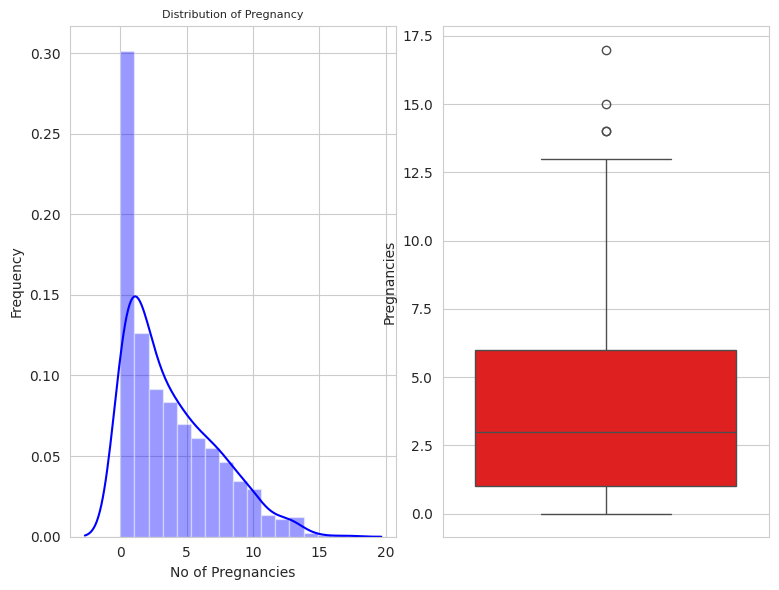

In [7]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot01=sns.boxplot(data=diabetes_data['Pregnancies'], ax=axes[1],orient = 'v', color='r')

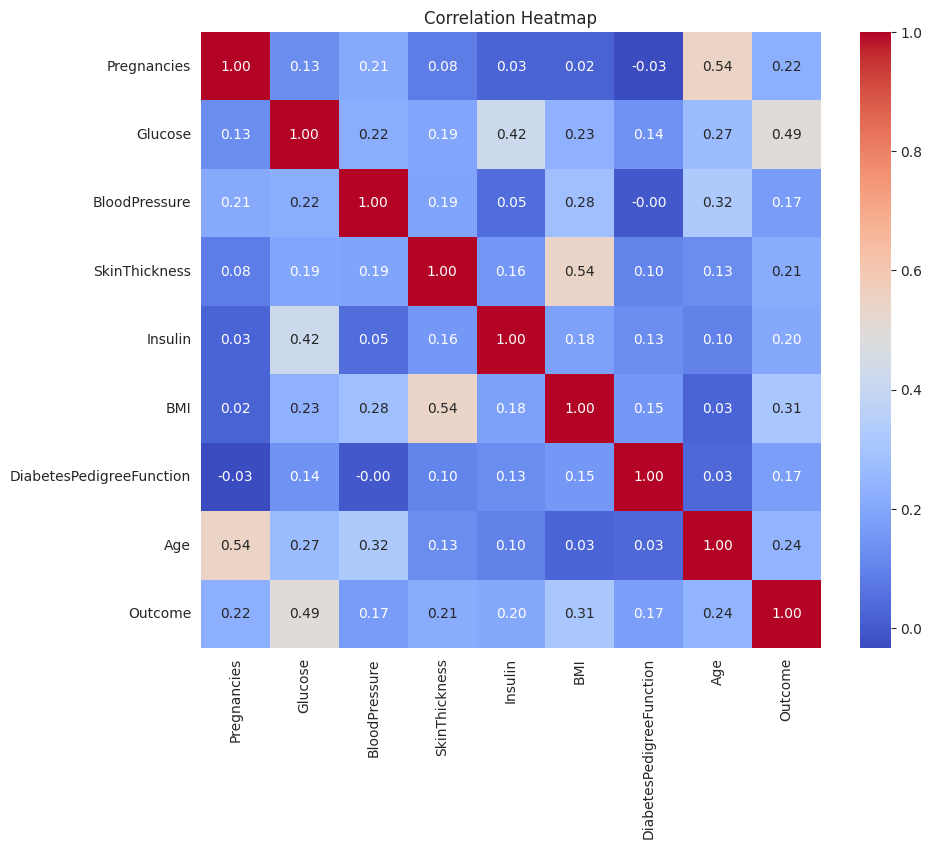

In [8]:
# TASK-1

correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [9]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


# Checking if the data is balanced or imbalanced

Outcome
0    500
1    268
Name: count, dtype: int64


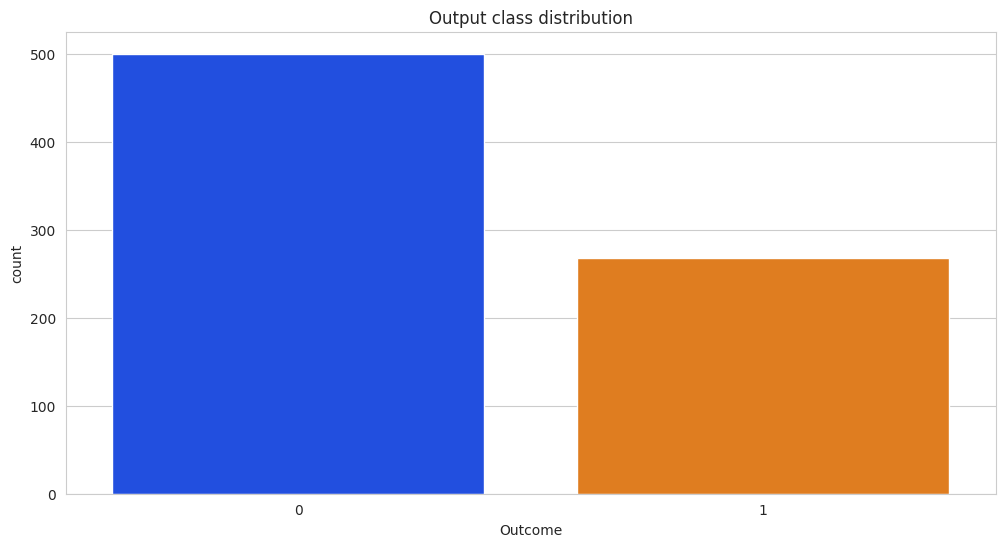

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Output class distribution")

print(diabetes_data['Outcome'].value_counts())

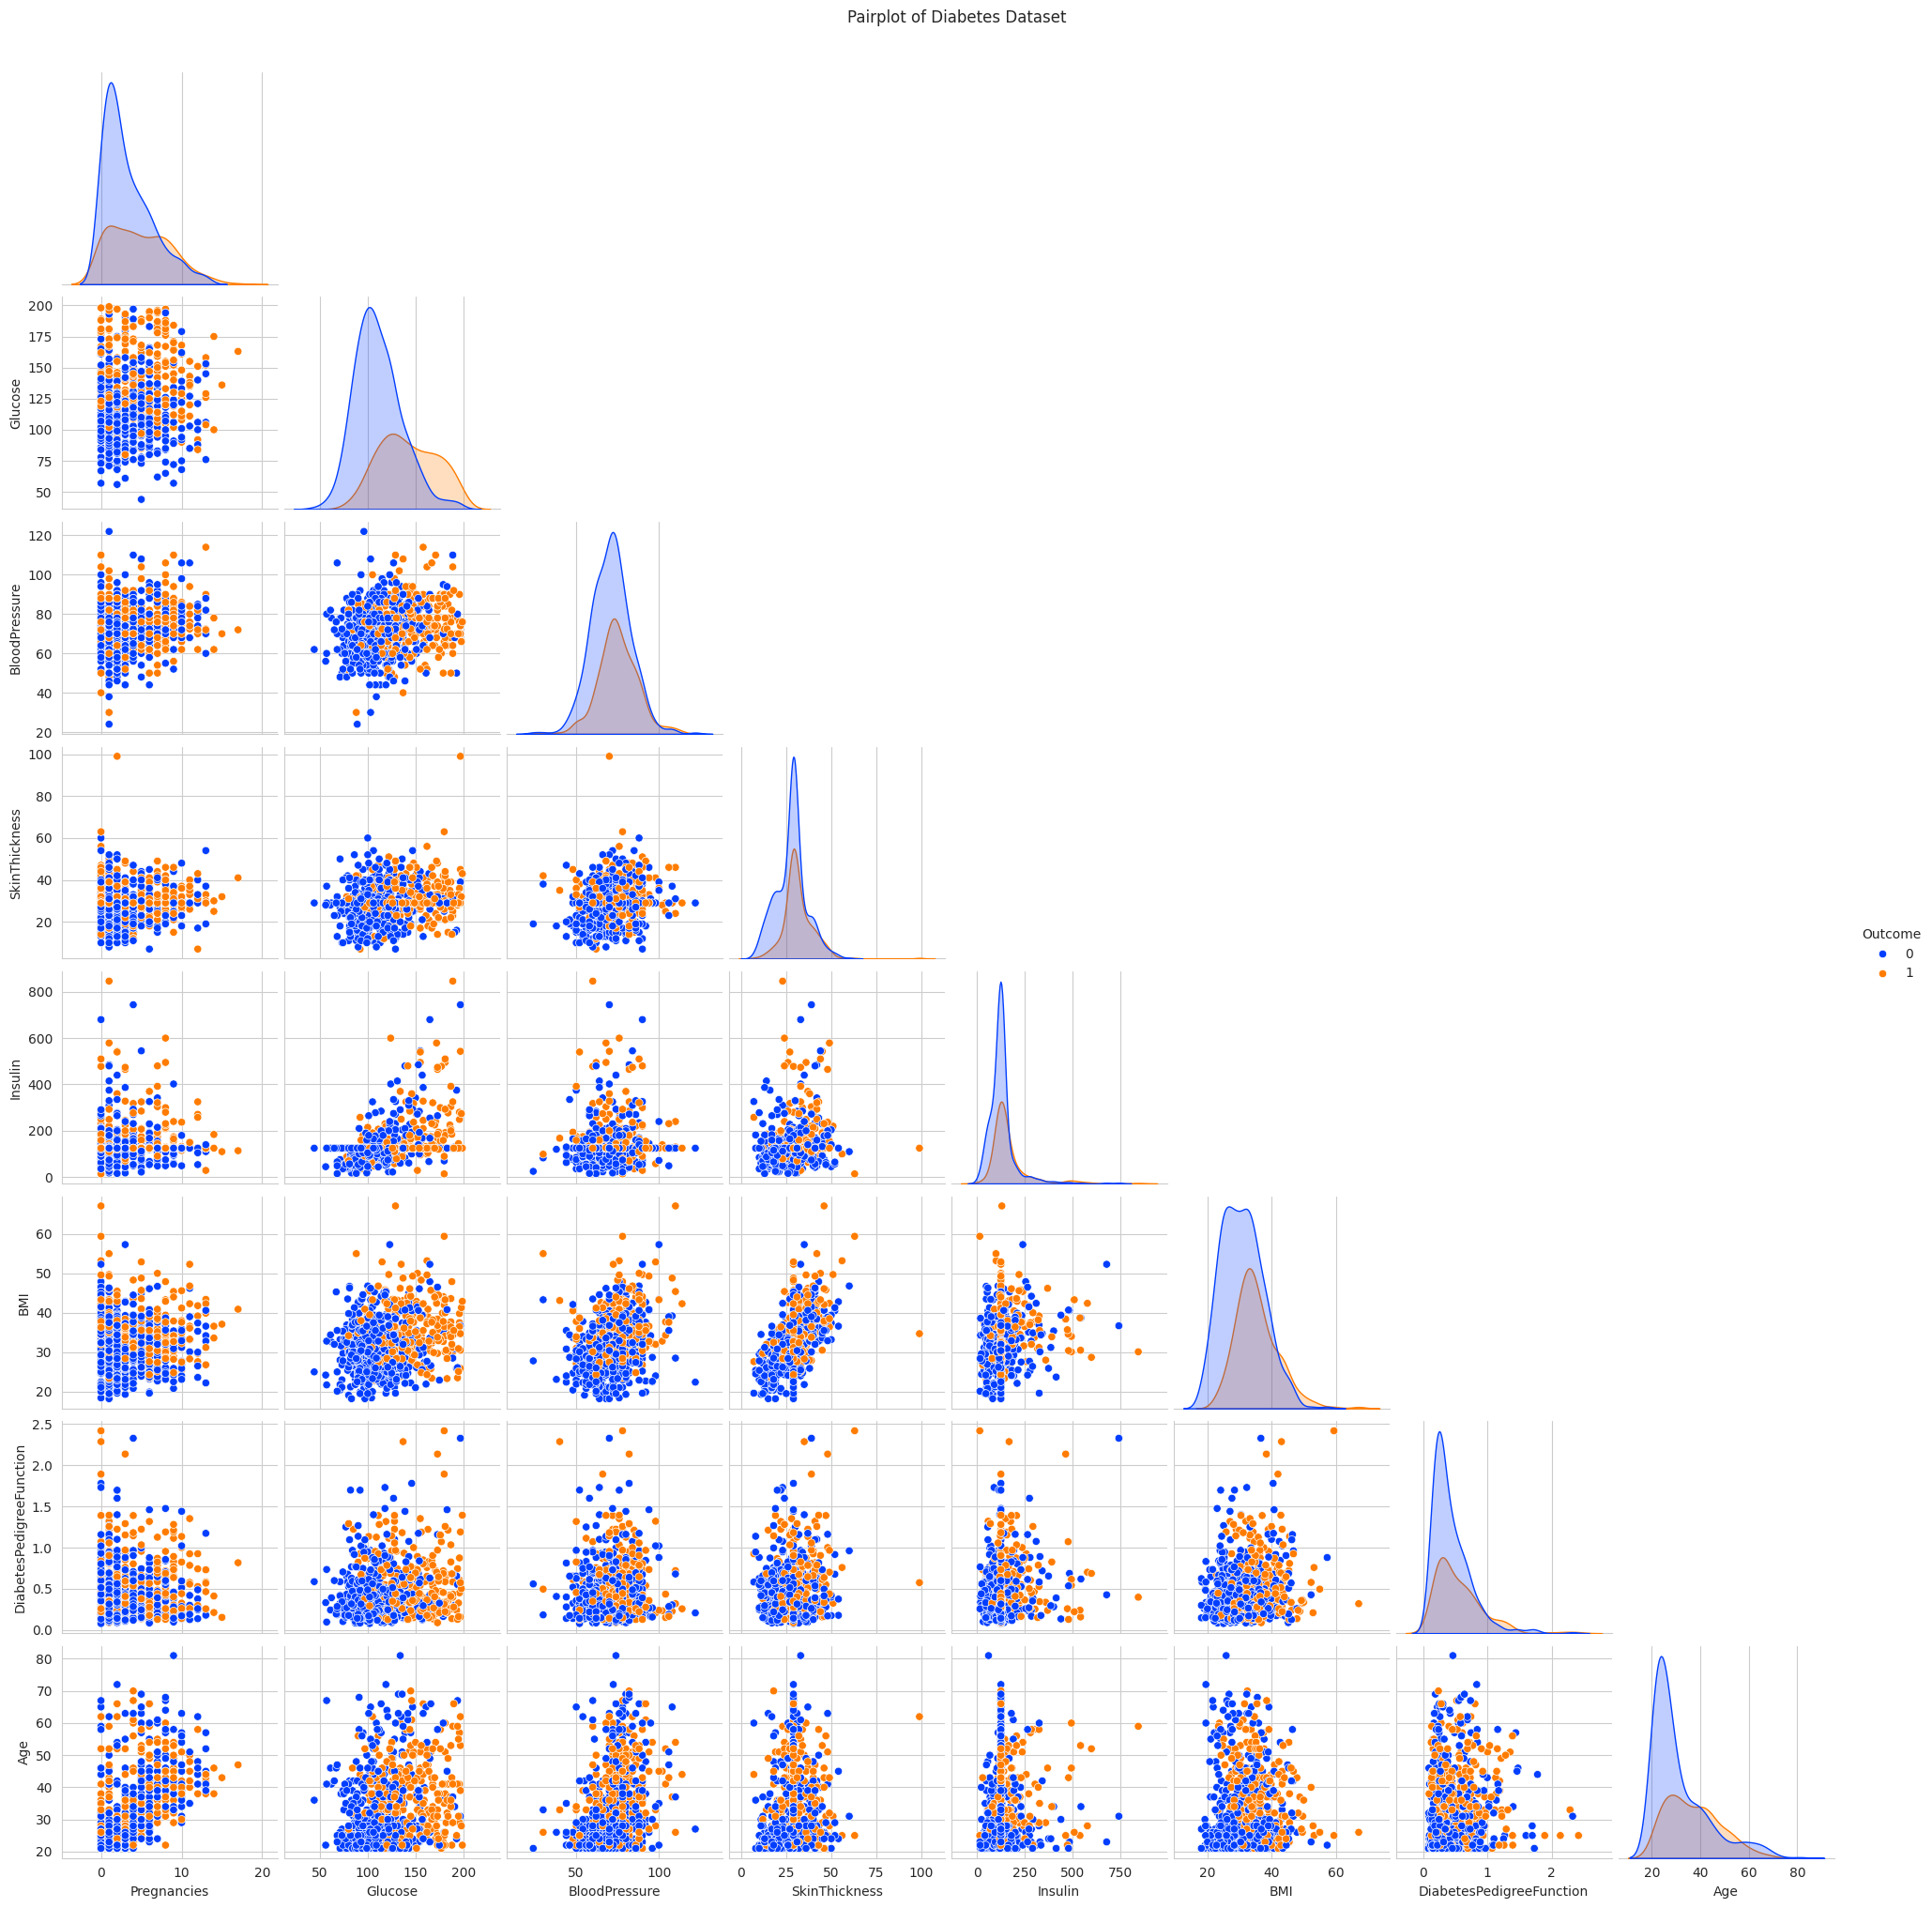

In [11]:
# TASK-2

sns.pairplot(diabetes_data, hue='Outcome', palette='bright', diag_kind='kde', corner=True)

plt.suptitle("Pairplot of Diabetes Dataset", y=1.02)  # Title slightly above the plot
plt.show()

# BMI vs Outcome

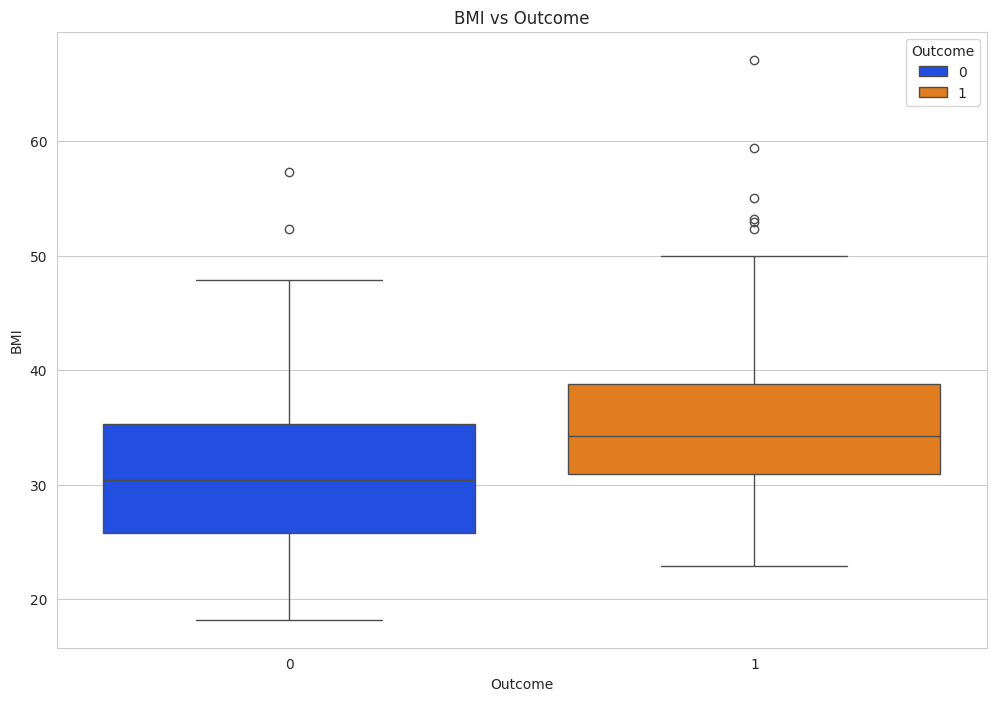

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI', data=diabetes_data, hue='Outcome',palette='bright')
plt.title("BMI vs Outcome")
plt.show()

# Pedigree function vs Diabetes

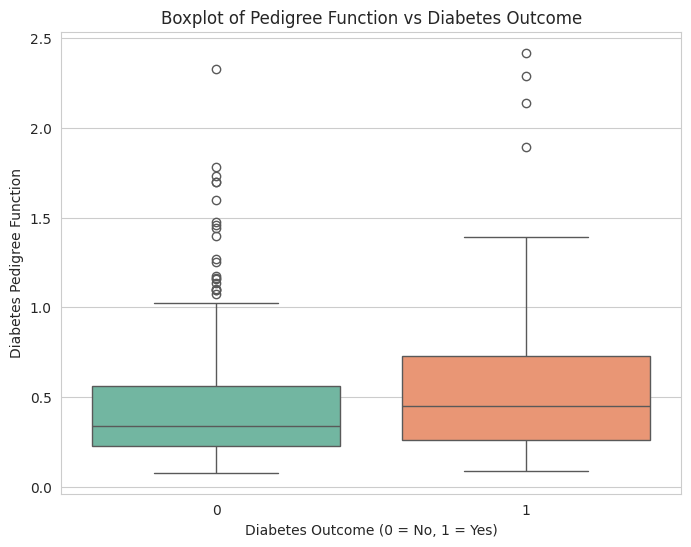

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_data, palette='Set2')
plt.title("Boxplot of Pedigree Function vs Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Diabetes Pedigree Function")
plt.show()

# Pregnancy vs Diabetes

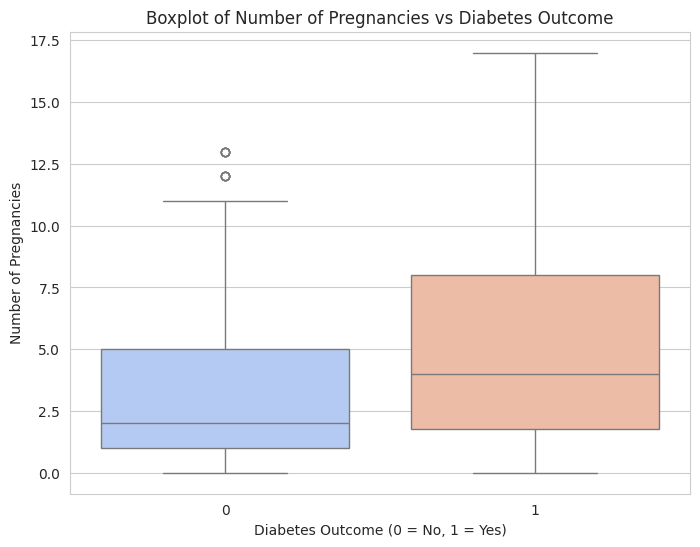

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=diabetes_data, palette='coolwarm')
plt.title("Boxplot of Number of Pregnancies vs Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Number of Pregnancies")
plt.show()

# Prevalence of Diabetes vs BMI

In [17]:
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

,count
Outcome,
0,101
1,7


In [18]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

,count
Outcome,
0,399
1,261


<Axes: xlabel='Outcome', ylabel='BMI'>

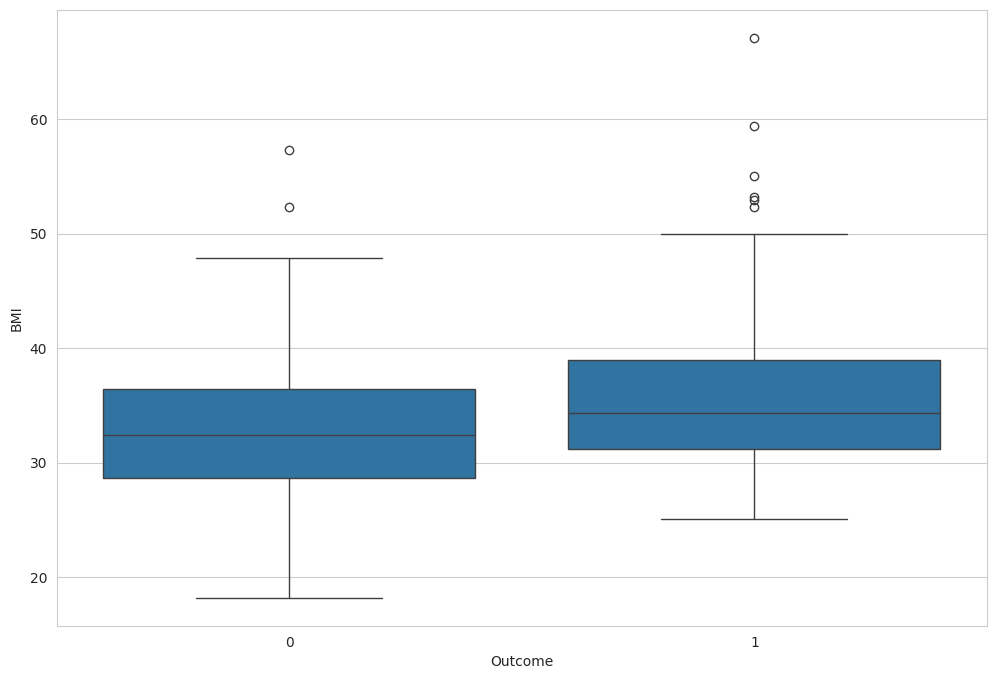

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)

# Age vs Diabetes

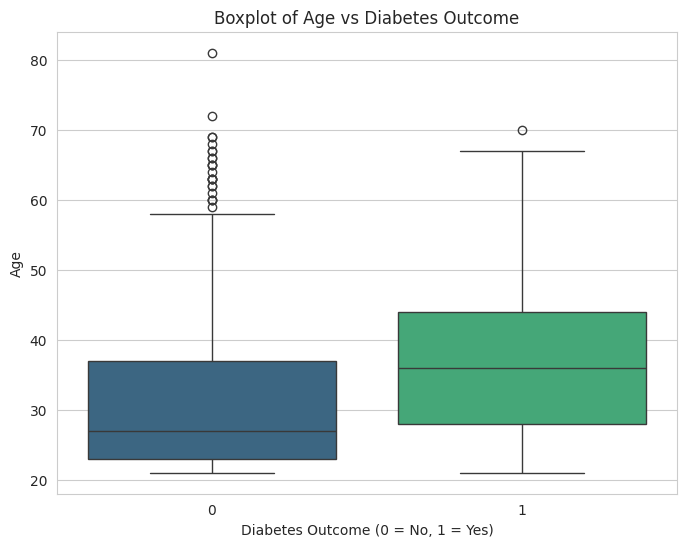

In [20]:
# TASK-5
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=diabetes_data, palette='viridis')
plt.title("Boxplot of Age vs Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# **The Importance of Standardizing Data**

In [21]:
unchanged_data = diabetes_data.drop('Outcome', axis=1)
unchanged_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Choosing a K value


Max train score 100.0 % and k = [1]

Max test score 73.16017316017316 % and k = [27, 28]


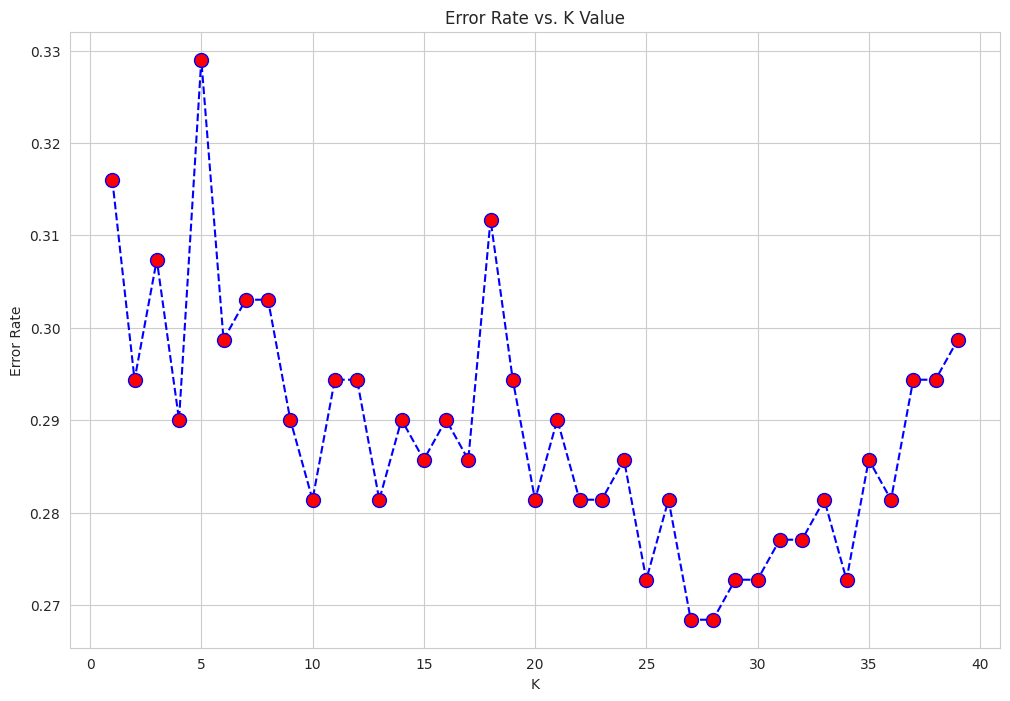

In [27]:
def plot_KNN_error_rate(xdata, ydata):
    error_rate = []
    test_scores = []
    train_scores = []

    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=42)

    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)

        error_rate.append(np.mean(pred_i != y_test))
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))

    plt.figure(figsize=(12, 8))
    plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    print()
    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_ind))))
    print()
    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

    return test_scores
unchanged_test_scores = plot_KNN_error_rate(unchanged_data,diabetes_data['Outcome'])

# **Standradize the Variables**

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to your data (excluding the 'Outcome' column)
scaler.fit(diabetes_data.drop('Outcome', axis=1))

StandardScaler()

In [35]:
scaled_data = scaler.transform(diabetes_data.drop('Outcome',axis=1))

In [37]:
df_feat = pd.DataFrame(scaled_data,columns=diabetes_data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496



Max train score 100.0 % and k = [1]

Max test score 75.75757575757575 % and k = [23, 24]


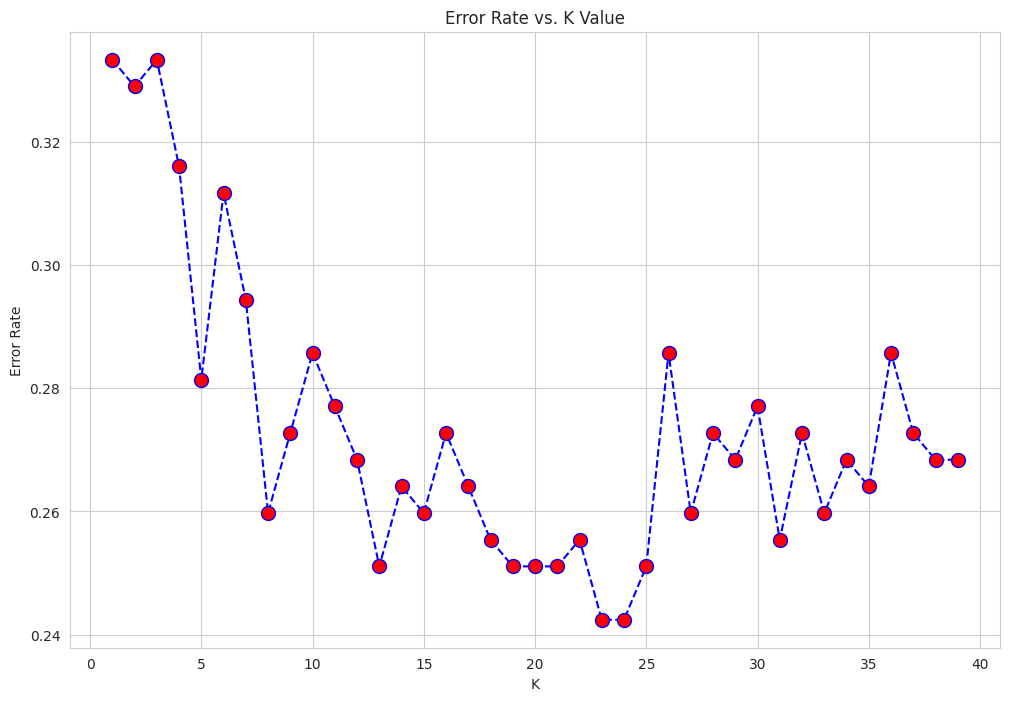

In [38]:
scaled_test_scores = plot_KNN_error_rate(scaled_data,diabetes_data['Outcome'])

# **Comparing Accuracy before and after Standardization**

<Axes: title={'center': 'Accuracy vs. K Value'}>

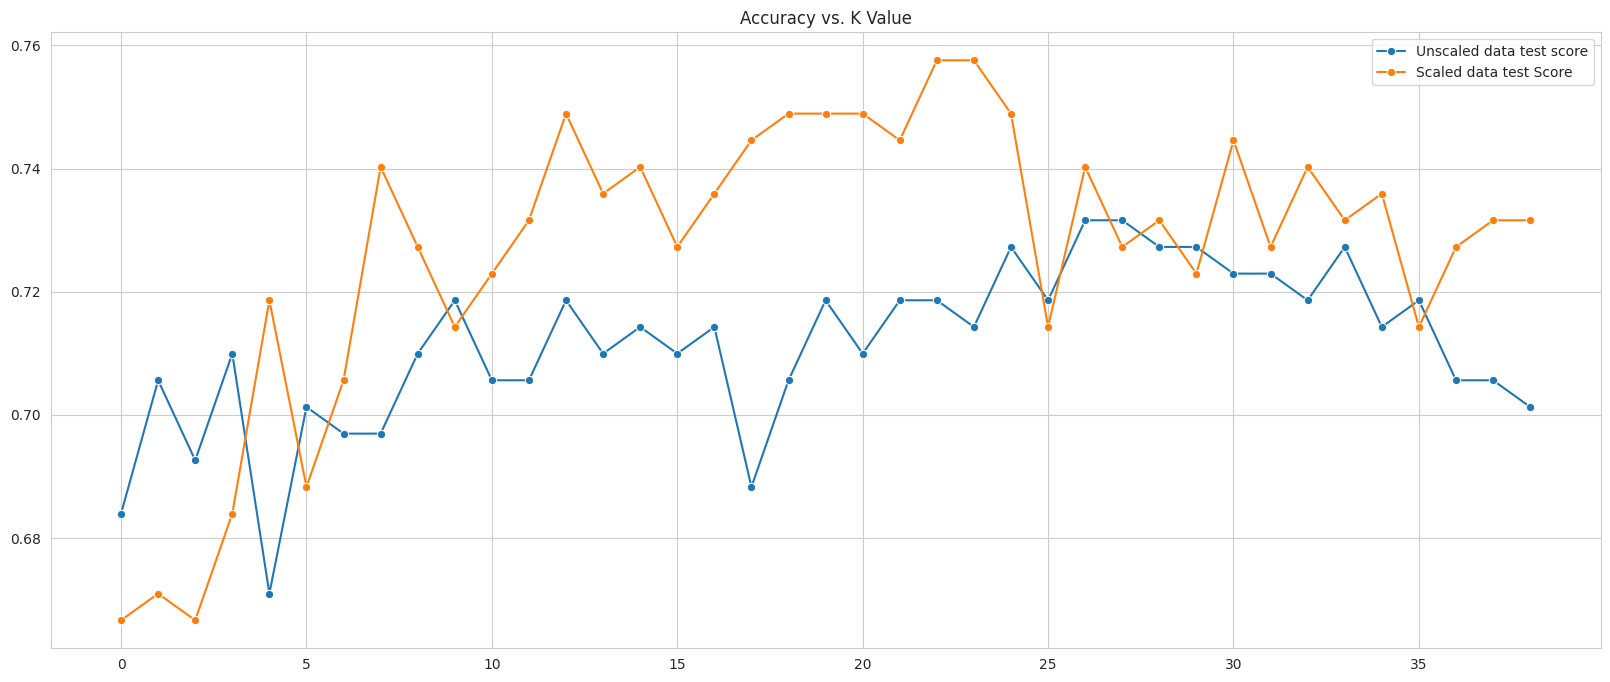

In [39]:
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(scaled_test_scores,marker='o',label='Scaled data test Score')

In [42]:
# TASK-7

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

minmax_scaler = MinMaxScaler()
scaled_minmax_data = minmax_scaler.fit_transform(diabetes_data.drop('Outcome', axis=1))
X_scaled_minmax = scaled_minmax_data
y = diabetes_data['Outcome']
knn = KNeighborsClassifier(n_neighbors=5)
minmax_scores = cross_val_score(knn, X_scaled_minmax, y, cv=5)  # K-Fold Cross Validation

print(f'K-Fold Cross Validation Scores (MinMax scaled data): {minmax_scores}')
print(f'Mean Accuracy: {minmax_scores.mean()}')


K-Fold Cross Validation Scores (MinMax scaled data): [0.72077922 0.77922078 0.68831169 0.81045752 0.76470588]
Mean Accuracy: 0.7526950174008997


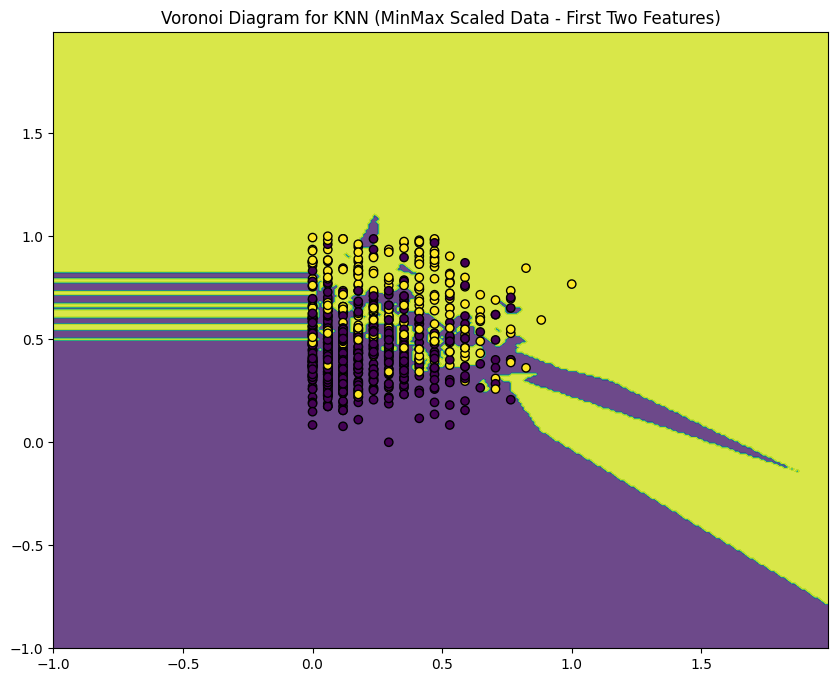

In [7]:
# TASK-8

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
diabetes_data = pd.read_csv('preprocessed_diabetes_data.csv')

minmax_scaler = MinMaxScaler()
X_scaled_minmax = minmax_scaler.fit_transform(diabetes_data.drop('Outcome', axis=1))

knn = KNeighborsClassifier(n_neighbors=5)

y = diabetes_data['Outcome']

X_vis = X_scaled_minmax[:, :2]

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = knn.fit(X_vis, y).predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Voronoi Diagram for KNN (MinMax Scaled Data - First Two Features)')
plt.show()

In [13]:
# TASK-9
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Import MinMaxScaler
import pandas as pd

diabetes_data = pd.read_csv('preprocessed_diabetes_data.csv')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(diabetes_data.drop('Outcome', axis=1))
X_scaled_data = scaled_data
y = diabetes_data['Outcome']
minmax_scaler = MinMaxScaler()
X_scaled_minmax = minmax_scaler.fit_transform(diabetes_data.drop('Outcome', axis=1))
scaled_scores = cross_val_score(knn, X_scaled_data, y, cv=5)
minmax_scores = cross_val_score(knn, X_scaled_minmax, y, cv=5)

print(f'Scaled Data K-Fold Scores: {scaled_scores}')
print(f'MinMax Scaled Data K-Fold Scores: {minmax_scores}')

print(f'Mean Accuracy for Scaled Data: {scaled_scores.mean()}')
print(f'Mean Accuracy for MinMax Scaled Data: {minmax_scores.mean()}')

Scaled Data K-Fold Scores: [0.74025974 0.74675325 0.68831169 0.77124183 0.7254902 ]
MinMax Scaled Data K-Fold Scores: [0.72077922 0.77922078 0.68831169 0.81045752 0.76470588]
Mean Accuracy for Scaled Data: 0.7344113402936931
Mean Accuracy for MinMax Scaled Data: 0.7526950174008997
